- Link to dataset: https://www.kaggle.com/datasets/ferrariboy4k/top5leagues
- Data columns: 
    - Div — League Division
    - Date — Match Date
    - HomeTeam, AwayTeam — Home and Away Team
    - HTOa, ATOa — Teams FIFA Overall Rating
    - HTAt, ATAt — Teams FIFA Attack Rating
    - HTMid, ATMid — Teams FIFA Midfield Rating
    - HTDef, ATDef — Teams FIFA Defence Rating
    - HomeSquad, AwaySquad — Teams Number of players
    - HomeAvgAge, AwayAvgAge — Teams Average Age of players
    - HomeMV, AwayMV — Teams Total Market Value
    - FTHG, FTAG — Full Time Teams Goals
    - FTR — Full Time Result (H=Home Win, D=Draw, A=Away Win)
    - HTHG, HTAG — Half Time Teams Goals
    - HTR — Half Time Result (H=Home Win, D=Draw, A=Away Win)
    - HS, AS — Teams Shots
    - HST, AST — Teams Shots on Target
    - HF, AF — Teams Fouls
    - HC, AC — Teams Corners
    - HY, AY — Teams Yellow Cards
    - HR, AR — Teams Red Cards
    - HxG, AxG — Teams Expected Goals
    - HxA, AxA — Teams Expected Goals After Key Passes
    - HxPTS, AxPTS — Teams Expected Points
    - HPPDA, APPDA — Teams passes allowed per defensive action in the opposition half
    - B365H, B365D, B365A — Bet365 odds
    - BWH, BWD, BWA — Bet&Win odds
    - IWH, IWD, IWA — Interwetten odds
    - PSH, PSD, PSA — Pinnacle odds
    - WHH, WHD, WHA — William Hill odds
    - VCH, VCD, VCA — VC Bet odds
    - PSCH, PSCD, PSCA — PSC odds

In [37]:
#Import our necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
epl_data = pd.read_csv('Data/EPL 2021-2022.csv')
epl_data.head()

,Div,Date,HomeTeam,AwayTeam,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,E0,2021-08-13,Brentford,Arsenal,73,79,73,82,73,80,...,2.05,4.00,3.40,1.90,4.10,3.40,2.00,3.94,3.33,2.13
1,E0,2021-08-14,Manchester United,Leeds,83,76,83,78,84,77,...,5.96,1.52,4.33,5.80,1.55,4.40,6.00,1.67,4.20,5.40
2,E0,2021-08-14,Burnley,Brighton,76,75,75,75,76,75,...,2.51,3.20,3.00,2.45,3.13,3.10,2.45,3.27,3.14,2.51
3,E0,2021-08-14,Chelsea,Crystal Palace,83,76,84,77,85,75,...,12.74,1.25,5.50,13.00,1.25,5.75,13.00,1.34,5.40,11.00
4,E0,2021-08-14,Everton,Southampton,79,76,80,76,79,76,...,4.10,1.95,3.40,4.00,1.95,3.40,4.10,2.05,3.45,4.07


In [39]:
epl_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HTOa,380.0,78.450000,3.446558,73.00,76.0000,78.000,80.2500,85.00
ATOa,380.0,78.460526,3.434424,73.00,76.0000,78.000,80.2500,85.00
HTAt,380.0,79.373684,3.820144,71.00,77.0000,78.000,83.0000,90.00
ATAt,380.0,79.323684,3.757556,71.00,76.0000,78.000,82.0000,90.00
HTMid,380.0,78.594737,3.779402,73.00,76.0000,78.000,81.0000,87.00
ATMid,380.0,78.589474,3.747280,73.00,76.0000,78.000,81.0000,87.00
HTDef,380.0,77.757895,3.510905,72.00,75.0000,77.000,79.0000,86.00
ATDef,380.0,77.794737,3.503481,72.00,75.0000,77.000,79.0000,86.00
HomeSquad,380.0,40.200000,4.713647,33.00,35.7500,40.500,44.0000,49.00
AwaySquad,380.0,40.200000,4.713647,33.00,35.7500,40.500,44.0000,49.00


In [40]:
epl_data.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'HTOa', 'ATOa', 'HTAt', 'ATAt',
       'HTMid', 'ATMid', 'HTDef', 'ATDef', 'HomeSquad', 'AwaySquad',
       'HomeAvgAge', 'AwayAvgAge', 'HomeMV', 'AwayMV', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'HxG', 'AxG', 'HxA', 'AxA', 'HxPTS', 'AxPTS',
       'HPPDA', 'APPDA', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD',
       'VCA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [41]:
epl_data['Date'] = pd.to_datetime(epl_data['Date'])
# epl_data['Year'] = epl_data['Date'].apply(lambda date: date.year)
# epl_data['Month'] = epl_data['Date'].apply(lambda date: date.month)

In [42]:
# Drop the columns that we don't need
epl_data = epl_data.drop(['Div', 'HomeTeam', 'AwayTeam', 'HomeSquad', 'AwaySquad'], axis =1)

## Exploratory Data Analysis

In [43]:
epl_data.head()

,Date,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,HTDef,ATDef,HomeAvgAge,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,2021-08-13,73,79,73,82,73,80,74,77,24,...,2.05,4.00,3.40,1.90,4.10,3.40,2.00,3.94,3.33,2.13
1,2021-08-14,83,76,83,78,84,77,83,76,25,...,5.96,1.52,4.33,5.80,1.55,4.40,6.00,1.67,4.20,5.40
2,2021-08-14,76,75,75,75,76,75,77,76,27,...,2.51,3.20,3.00,2.45,3.13,3.10,2.45,3.27,3.14,2.51
3,2021-08-14,83,76,84,77,85,75,82,74,25,...,12.74,1.25,5.50,13.00,1.25,5.75,13.00,1.34,5.40,11.00
4,2021-08-14,79,76,80,76,79,76,79,76,25,...,4.10,1.95,3.40,4.00,1.95,3.40,4.10,2.05,3.45,4.07


<Axes: title={'center': 'AxG'}, xlabel='FTAG'>

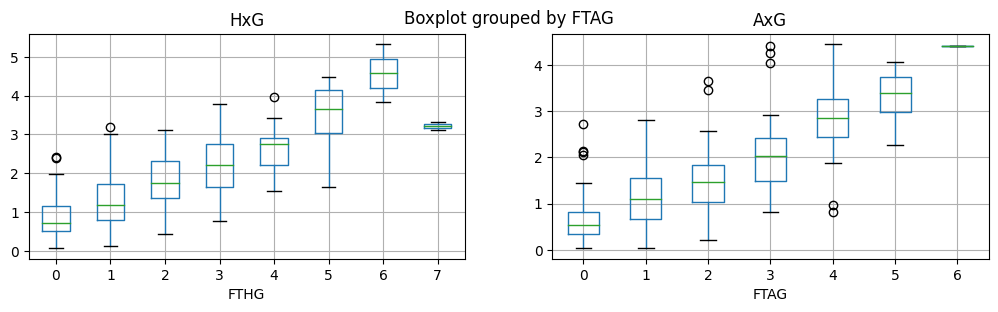

In [44]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(12,3))
epl_data.boxplot(by = 'FTHG', column = 'HxG', ax=axes[0],)
epl_data.boxplot(by = 'FTAG', column = 'AxG', ax=axes[1])

Expected goals are an underlying metric calculated based on the probability of a shot being scored, based on shots from the same location. You can sum this over a game to get a team's xG. While it is a deeply imperfect statistic, we can see here that the more goals a team scores, the larger the xG tends to be. Over a large enough sample, we expect that xG will be equal to goals scored. Only 2 home teams in 2021-2022 scored 7 goals, so we can disregard that column.

<Axes: xlabel='HomeMV', ylabel='HTOa'>

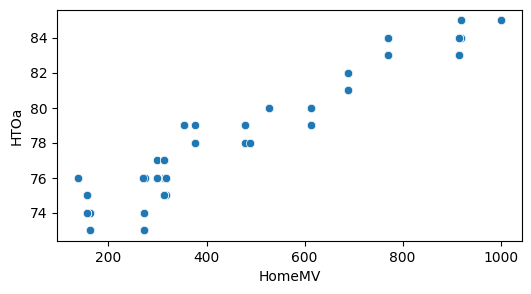

In [45]:
plt.figure(figsize=(6,3))
sns.scatterplot(data = epl_data, x = 'HomeMV', y = 'HTOa')

Here, we can see that generally, the more valuable a team (x-axis), the better rated that team is on FIFA (y-axis). This is logical as it shows that spending more money does tend to lead to a better quality of player. Whether this translates to results is a different question.

<Axes: xlabel='FTR', ylabel='BWH'>

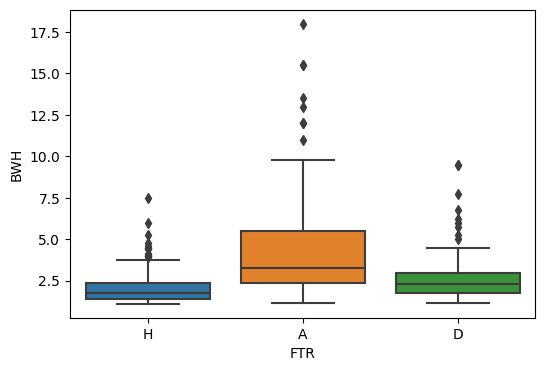

In [46]:
plt.figure(figsize=(6,4))
sns.boxplot(data = epl_data, x = 'FTR', y = 'BWH')

Here, we can see that on one betting site, home teams tend to be more of a favorite when they win than when they draw or lose. This is very logical, as if they are predicted to win (because of underlying stats, players, etc.), they are more likely to win.

This made me wonder, is there a reason as to why the home teams tend to be favored?

In [47]:
epl_data['FTR'].value_counts()/380*100

FTR
H    42.894737
A    33.947368
D    23.157895
Name: count, dtype: float64

There is! They won 42.9% of their games in 2021-22, versus drawing 23.2%, and losing 33.9%. This is a pretty sizable difference, lending to the "home field advantage" theory.

In [48]:
home_betting_values = epl_data[['VCH', 'WHH','IWH','PSH','BWH','PSCH', 'B365H']]



In [49]:
home_betting_corr = home_betting_values.corr()

<Axes: >

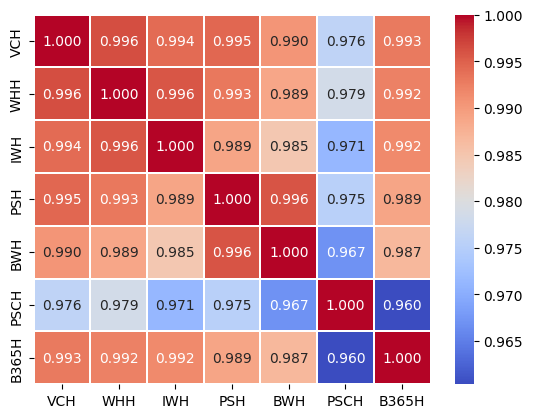

In [50]:
sns.heatmap(data = home_betting_corr, annot = True, fmt=".3f", linewidth = .25, cmap = 'coolwarm')

Taking a look at betting lines, we would expect them to all be very closely correlated. This is true for most of the books, as there is a .985 to .996 correlation between any of the books, excluding PSC (Pinnacle). Pinnacle has a correlation range of .960-.979 with all the other books. While this is still extremely strong, it is something interesting to note that these tend to be relative outliers.

Let's see what makes Pinnacle so different

In [51]:
home_betting_values.describe()

,VCH,WHH,IWH,PSH,BWH,PSCH,B365H
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,3.088105,3.064579,3.029289,3.165289,3.026105,3.192026,3.041026
std,2.598797,2.473830,2.348604,2.587414,2.372764,2.684001,2.380071
min,1.070000,1.080000,1.120000,1.110000,1.110000,1.100000,1.080000
25%,1.620000,1.630000,1.650000,1.670000,1.630000,1.690000,1.610000
50%,2.250000,2.300000,2.300000,2.370000,2.300000,2.355000,2.275000
75%,3.250000,3.212500,3.212500,3.357500,3.300000,3.545000,3.300000
max,19.000000,17.000000,18.000000,18.960000,18.000000,23.500000,19.000000


It looks like they tend to give worse odds for the home team to win (they have the highest max, a higher mean, and a larger standard deviation)

Is this also the case for away odds?

<Axes: >

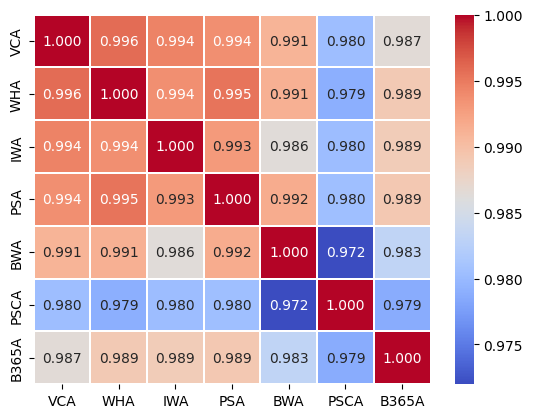

In [52]:
away_betting_values = epl_data[['VCA', 'WHA','IWA','PSA','BWA','PSCA', 'B365A']]
away_betting_corr = away_betting_values.corr()
sns.heatmap(data = away_betting_corr, annot = True, fmt=".3f", linewidth = .25, cmap = 'coolwarm')

In [53]:
away_betting_values.describe()

,VCA,WHA,IWA,PSA,BWA,PSCA,B365A
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,4.840711,4.798974,4.561711,5.011500,4.639263,4.981974,4.690079
std,4.688215,4.530138,4.005687,4.860372,4.264799,4.710213,4.230893
min,1.130000,1.150000,1.150000,1.170000,1.170000,1.130000,1.140000
25%,2.200000,2.250000,2.250000,2.277500,2.200000,2.237500,2.237500
50%,3.200000,3.225000,3.175000,3.310000,3.200000,3.380000,3.250000
75%,5.500000,5.500000,5.250000,5.760000,5.500000,5.542500,5.500000
max,26.000000,26.000000,22.000000,27.790000,23.000000,31.000000,26.000000


There seems to be more variablity for away odds, but Pinnacle does not correlate as well with the rest of the books. This is something interesting to note!

Although I could continue to analyze this data (as there is plenty of it), I want to get into trying to predict outcomes of the games.
Clearly, if we want to predict the results of games before they happen, we need to drop all the halftime and fulltime stats.

In [54]:
pregame_epl_data = epl_data.drop(['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HxG', 'AxG', 'HxA', 'AxA', 'HxPTS', 'HPPDA', 'APPDA', 'AxPTS'], axis = 1)

We need to convert the full time result (FTR) column from categorical data. We will encode 1 as a win for the home team, and 0 as a draw and -1 as a win for the away team

In [55]:
new_column = []
for index, row in pregame_epl_data.iterrows():
    if row['FTR'] == 'H':
        new_column.append(1)
    if row['FTR'] == 'A':
        new_column.append(-1)
    if row['FTR'] == 'D':
        new_column.append(0)


In [56]:
pregame_epl_data['Result'] = new_column

In [57]:
pregame_epl_data = pregame_epl_data.drop('FTR', axis = 1)

In [58]:
pregame_epl_data.head()

,Date,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,HTDef,ATDef,HomeAvgAge,...,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,Result
0,2021-08-13,73,79,73,82,73,80,74,77,24,...,4.00,3.40,1.90,4.10,3.40,2.00,3.94,3.33,2.13,1
1,2021-08-14,83,76,83,78,84,77,83,76,25,...,1.52,4.33,5.80,1.55,4.40,6.00,1.67,4.20,5.40,1
2,2021-08-14,76,75,75,75,76,75,77,76,27,...,3.20,3.00,2.45,3.13,3.10,2.45,3.27,3.14,2.51,-1
3,2021-08-14,83,76,84,77,85,75,82,74,25,...,1.25,5.50,13.00,1.25,5.75,13.00,1.34,5.40,11.00,1
4,2021-08-14,79,76,80,76,79,76,79,76,25,...,1.95,3.40,4.00,1.95,3.40,4.10,2.05,3.45,4.07,1


In [59]:
pregame_epl_data.columns

Index(['Date', 'HTOa', 'ATOa', 'HTAt', 'ATAt', 'HTMid', 'ATMid', 'HTDef',
       'ATDef', 'HomeAvgAge', 'AwayAvgAge', 'HomeMV', 'AwayMV', 'B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD',
       'PSCA', 'Result'],
      dtype='object')

Now, lets start trying to predict whether the home team wins. We can start with a very basic logistic regression.

## Logistic Regression:

In [60]:
X = pregame_epl_data.drop(['Result', 'Date'], axis = 1)
y = pregame_epl_data['Result']

In [61]:
from sklearn.model_selection import train_test_split


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression


In [64]:
lm = LogisticRegression()

In [65]:
lm.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[ 2.96351864e-03 -3.00166026e-02 -3.18741039e-02 -1.92544092e-02
   1.46602799e-03 -4.61983493e-03  4.74819976e-02  8.27358670e-02
  -9.34927289e-02 -6.45119701e-02 -1.42172696e-03  2.21402083e-04
   3.37129380e-02 -2.78607704e-03  1.74666377e-03  4.94030312e-02
  -2.23233523e-03  1.48383254e-02  4.10146027e-02  9.88213600e-03
   4.00673676e-03  5.39953503e-02 -2.64182242e-03 -1.46343593e-03
   3.66754693e-02 -3.20938784e-03  2.00641456e-03  3.41663874e-02
  -9.50768224e-03 -1.49123085e-04  3.28291835e-02 -7.35107272e-03
  -1.04588394e-02]
 [-2.20778502e-02 -6.56081244e-03 -1.14877288e-01 -4.01852262e-02
   1.28969099e-02  1.41497346e-02  4.85002645e-02  7.34886741e-02
   1.10424129e-01 -5.10902212e-03  2.49909040e-03 -1.80641170e-03
   1.37210334e-02  9.20505244e-03 -1.20792158e-02  7.57414696e-03
   3.37731631e-03 -4.79249546e-03  1.39258590e-02 -2.01851737e-02
  -1.51268941e-02  1.34764597e-02 -4.93592179e-03 -2.78273483e-02
   2.17586559e-02 -1.09510342e-02 -2.0986

In [67]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

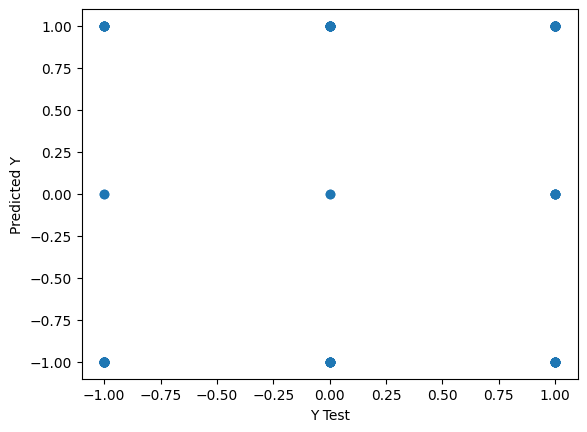

In [68]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [100]:
coeffecients = pd.DataFrame({'Variable':X.columns,'Coeffecient':lm.coef_[1]})
coeffecients



,Variable,Coeffecient
0,HTOa,-0.022078
1,ATOa,-0.006561
2,HTAt,-0.114877
3,ATAt,-0.040185
4,HTMid,0.012897
5,ATMid,0.014150
6,HTDef,0.048500
7,ATDef,0.073489
8,HomeAvgAge,0.110424
9,AwayAvgAge,-0.005109


We can see that there is a relatively small impact of any one column on the outcome of the predictions. This makes sense as we have so many variables to look at. Interestingly, the market values of the two teams seem to have an almost negligable increase on the predictions. Even though the values tend to be large than the others, it is not big enough to overcome this.

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.57      0.75      0.65        40
           0       0.20      0.07      0.11        27
           1       0.55      0.60      0.57        47

    accuracy                           0.53       114
   macro avg       0.44      0.47      0.44       114
weighted avg       0.47      0.53      0.49       114



This is not very good. However, the amount of data may be a contributing factor here, as we only have 88 draws, 129 wins by the away team, and 163 wins by the home team. In future iterations, I plan to expand this to include more years' worth of data, and that may help the model become more accurate.

## K Nearest Neighbors

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

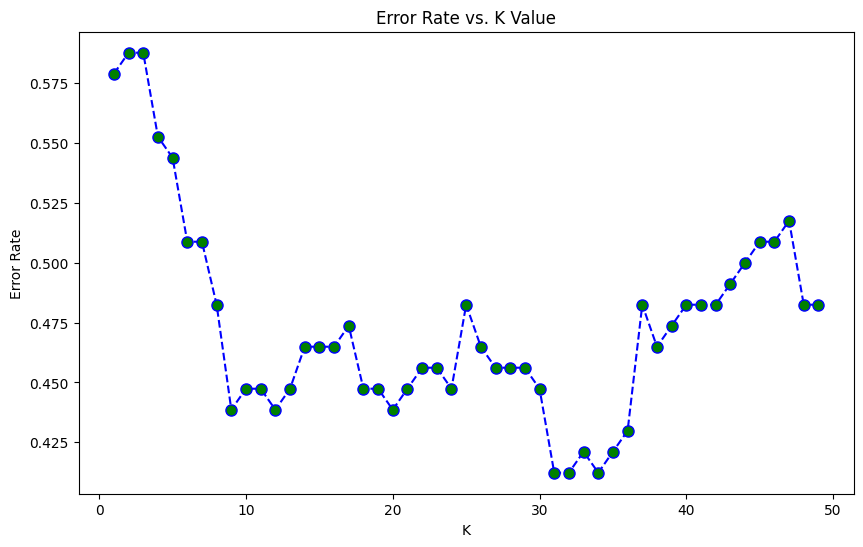

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Based on this, it looks like an K of 31 is our ideal selection. This gives us a comparatively low error rate at the smallest K value. While it looks like we can get a slightly smaller error at either 32 or 34, this requires our K to be larger, which may not be worth it if we are computing many data points as it will slow us down. The more points we have to check, the longer it will take. In this case it will not make a tangible difference, but to practice best practices, I will stick with using K = 31.

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
knn = KNeighborsClassifier(n_neighbors=31)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=31')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=31


[[26  5  9]
 [ 9  8 10]
 [ 8  6 33]]


              precision    recall  f1-score   support

          -1       0.60      0.65      0.63        40
           0       0.42      0.30      0.35        27
           1       0.63      0.70      0.67        47

    accuracy                           0.59       114
   macro avg       0.55      0.55      0.55       114
weighted avg       0.57      0.59      0.58       114



KNN did better than a simple logistic regression, but still did not perform very well. We will continue to try other methods to improve.

## Decision Trees and Random Forests

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
predictions = dtree.predict(X_test)

In [79]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[19  9 12]
 [11  9  7]
 [ 9 17 21]]


              precision    recall  f1-score   support

          -1       0.49      0.47      0.48        40
           0       0.26      0.33      0.29        27
           1       0.53      0.45      0.48        47

    accuracy                           0.43       114
   macro avg       0.42      0.42      0.42       114
weighted avg       0.45      0.43      0.44       114



This decision tree does not do very well, but lets see if a random forest can do better

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [81]:
predictions = rfc.predict(X_test)

In [82]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[25  4 11]
 [12  4 11]
 [13  6 28]]


              precision    recall  f1-score   support

          -1       0.50      0.62      0.56        40
           0       0.29      0.15      0.20        27
           1       0.56      0.60      0.58        47

    accuracy                           0.50       114
   macro avg       0.45      0.46      0.44       114
weighted avg       0.47      0.50      0.48       114



The random forest does better than the decision tree, but still not as good as KNN. Next, let's see if Support Vector Machines can improve our predictive results.

## Support Vector Machines

In [101]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [102]:
predictions = svc_model.predict(X_test)

In [103]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[26  2 12]
 [11  0 16]
 [12  2 33]]


              precision    recall  f1-score   support

          -1       0.53      0.65      0.58        40
           0       0.00      0.00      0.00        27
           1       0.54      0.70      0.61        47

    accuracy                           0.52       114
   macro avg       0.36      0.45      0.40       114
weighted avg       0.41      0.52      0.46       114



We have still failed to improve on KNN. Next is going to be K Means Clustering.

## K Means Clustering